### Importing required packages

In [2]:
import numpy as np
import pandas as pd

### Data Exploration

#### What aisles are available?

In [3]:
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles['aisle'].unique()

(134, 2)


array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

#### 'Dog Food Care' looks relevant:

In [4]:
dog_aisle_id = aisles[aisles['aisle']=='dog food care']['aisle_id'].values[0]
print(aisles[aisles['aisle']=='dog food care'], end='\n\n')
print(f'Dog Food Care Aisle ID = {dog_aisle_id}')

    aisle_id          aisle
39        40  dog food care

Dog Food Care Aisle ID = 40


#### What departments are available?

In [5]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments['department'].unique()

(21, 2)


array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

#### 'Pets' looks relevant:

In [6]:
pets_dept_id = departments[departments['department']=='pets']['department_id'].values[0]
print(departments[departments['department']=='pets'], end='\n\n')
print(f'Pets Department ID = {pets_dept_id}')

   department_id department
7              8       pets

Pets Department ID = 8


#### What products are available? 

In [7]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


#### What/how many products are available in the Pets department?

In [8]:
n_pets_dept_products = products[products['department_id']==pets_dept_id].shape[0]
pet_dept_products = products[products['department_id']==pets_dept_id]
print(f'There are {n_pets_dept_products} products in the Pets department')
pet_dept_products.head()

There are 972 products in the Pets department


,product_id,product_name,aisle_id,department_id
20,21,Small & Medium Dental Dog Treats,40,8
25,26,Fancy Feast Trout Feast Flaked Wet Cat Food,41,8
53,54,24/7 Performance Cat Litter,41,8
91,92,Meat In The Middle Large Rawhide Chews,40,8
235,236,Chicken Meatballs Dog Treats,40,8


#### What/how many products are available in the Dog Food Care aisle?

In [9]:
n_dog_aisle_products = products[products['aisle_id']==dog_aisle_id].shape[0]
dog_aisle_products = products[products['aisle_id']==dog_aisle_id]
print(f'There are {n_dog_aisle_products} products in the Dog Food Care aisle')
dog_aisle_products.head()

There are 473 products in the Dog Food Care aisle


,product_id,product_name,aisle_id,department_id
20,21,Small & Medium Dental Dog Treats,40,8
91,92,Meat In The Middle Large Rawhide Chews,40,8
235,236,Chicken Meatballs Dog Treats,40,8
281,282,Oh My Cod! Cod Pate and Vegetables Cat Food,40,8
301,302,Gourmet Dog Treats Bone,40,8


#### Are all of the items in the Dog Food Care aisle in the Pets department? Yes, the empty set that was returned confirmed that.

In [10]:
dap = set(dog_aisle_products['product_name'])
pdp = set(pet_dept_products['product_name'])
delta = dap - pdp
delta

set()

#### Sample order data:

In [11]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
orders_prior = pd.read_csv('order_products__prior.csv')
print(orders_prior.shape)
orders_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
orders_train = pd.read_csv('order_products__train.csv')
print(orders_train.shape)
orders_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


#### Concatenate order_products__ DataFrames for exploration

In [14]:
orders_product_all = pd.concat([orders_prior, orders_train])
orders_product_all.shape

(33819106, 4)

#### How many 'Pets' department products were ordered in the Instacart dataset?

In [15]:
pets_orders = orders_product_all[orders_product_all['product_id'].isin(pet_dept_products['product_id'])]
print(f'{len(pets_orders)} "Pets" department products were ordered in the Instacart dataset')

102221 "Pets" department products were ordered in the Instacart dataset


#### What is the percentage of products sold in the dataset that were 'Pets' department related?

In [16]:
percent_pet_products = len(pets_orders) / len(orders_product_all)
percent_pet_products = percent_pet_products * 100
print(f'{percent_pet_products:.3f}% percent of the products sold within the Instacart dataset were "Pets" department products')

0.302% percent of the products sold within the Instacart dataset were "Pets" department products


#### How many Dog Food Care products were ordered in the Instacart dataset?

In [17]:
dog_orders = orders_product_all[orders_product_all['product_id'].isin(dog_aisle_products['product_id'])]
print(f'{len(dog_orders)} Dog Food Care products were ordered in the Instacart dataset')

35915 Dog Food Care products were ordered in the Instacart dataset


#### What is the percentage of products sold in the dataset that were Dog Food Care related?

In [18]:
percent_dog_products = len(dog_orders) / len(orders_product_all)
percent_dog_products = percent_dog_products * 100
print(f'{percent_dog_products:.3f}% percent of the products sold within the Instacart dataset were Dog Food Care products')

0.106% percent of the products sold within the Instacart dataset were Dog Food Care products


#### How many unique orders for Dog Food Care products were placed?

In [19]:
unique_dog_orders = len(dog_orders['order_id'].unique())
print(f'{unique_dog_orders} unique orders were made to purchase the {len(dog_orders)} Dog Food Care products in the Instacart dataset')

27142 unique orders were made to purchase the 35915 Dog Food Care products in the Instacart dataset


#### How many Dog Food Products were re-ordered?

In [20]:
dog_food_product_reorders = dog_orders[dog_orders['reordered']==1]
print(f'{len(dog_food_product_reorders)} of the Dog Food Care products purchased were reorders')

20335 of the Dog Food Care products purchased were reorders


#### Dog Food Product re-order rate:

In [21]:
percent_dog_food_reorder = len(dog_food_product_reorders) / len(dog_orders)
percent_dog_food_reorder = percent_dog_food_reorder * 100
print(f'{percent_dog_food_reorder: .2f}% of Dog Food Care products ordered were re-orders')

 56.62% of Dog Food Care products ordered were re-orders


#### What is the distribution of products sold across all aisles?

In [22]:
aisle_names = aisles['aisle'].unique()

aisle_percent_order = {}

for aisle_name in aisle_names:
    aisle_id = aisles[aisles['aisle']==aisle_name]['aisle_id'].values[0]
    aisle_products = products[products['aisle_id']==aisle_id]
    aisle_orders = orders_product_all[orders_product_all['product_id'].isin(aisle_products['product_id'])]
    percent_order = round((len(aisle_orders) / len(orders_product_all)) * 100, 2)
    aisle_percent_order[aisle_name] = percent_order

sorted_aisle_percent_order = sorted(aisle_percent_order.items(), key=lambda kv: kv[1], reverse=True)
sorted_aisle_percent_order

[('fresh fruits', 11.21),
 ('fresh vegetables', 10.55),
 ('packaged vegetables fruits', 5.45),
 ('yogurt', 4.46),
 ('packaged cheese', 3.02),
 ('milk', 2.73),
 ('water seltzer sparkling water', 2.6),
 ('chips pretzels', 2.23),
 ('soy lactosefree', 1.96),
 ('bread', 1.8),
 ('refrigerated', 1.77),
 ('frozen produce', 1.61),
 ('ice cream ice', 1.54),
 ('crackers', 1.41),
 ('energy granola bars', 1.4),
 ('eggs', 1.4),
 ('lunch meat', 1.22),
 ('frozen meals', 1.21),
 ('baby food formula', 1.17),
 ('fresh herbs', 1.16),
 ('cereal', 1.16),
 ('soft drinks', 1.11),
 ('fresh dips tapenades', 1.1),
 ('soup broth bouillon', 1.07),
 ('juice nectars', 1.03),
 ('baking ingredients', 1.0),
 ('cream', 0.98),
 ('other creams cheeses', 0.95),
 ('hot dogs bacon sausage', 0.94),
 ('nuts seeds dried fruit', 0.94),
 ('candy chocolate', 0.92),
 ('canned jarred vegetables', 0.92),
 ('spreads', 0.89),
 ('packaged produce', 0.86),
 ('canned meals beans', 0.83),
 ('dry pasta', 0.82),
 ('butter', 0.78),
 ('breakfa

#### Convert 'sorted_aisle_percent_order' to DataFrame & Write to CSV

In [23]:
df = pd.DataFrame(sorted_aisle_percent_order, columns=['product', 'percent order'])
df.to_csv('sorted_aisle_percent_order.csv')
df.head(5)

,product,percent order
0,fresh fruits,11.21
1,fresh vegetables,10.55
2,packaged vegetables fruits,5.45
3,yogurt,4.46
4,packaged cheese,3.02


#### How does product reorder rate differ by aisle? How does Dog Food Care reorders (56.62%) compare?

In [24]:
aisle_percent_reorder = {}

for aisle_name in aisle_names:
    aisle_id = aisles[aisles['aisle']==aisle_name]['aisle_id'].values[0]
    aisle_products = products[products['aisle_id']==aisle_id]
    aisle_orders = orders_product_all[orders_product_all['product_id'].isin(aisle_products['product_id'])]
    aisle_reorders = aisle_orders[aisle_orders['reordered']==1]
    percent_reorder = round((len(aisle_reorders) / len(aisle_orders)) * 100, 2)
    aisle_percent_reorder[aisle_name] = percent_reorder

sorted_aisle_percent_reorder = sorted(aisle_percent_reorder.items(), key=lambda kv: kv[1], reverse=True)
sorted_aisle_percent_reorder

[('milk', 78.18),
 ('water seltzer sparkling water', 72.99),
 ('fresh fruits', 71.88),
 ('eggs', 70.64),
 ('soy lactosefree', 69.24),
 ('packaged produce', 69.2),
 ('yogurt', 68.65),
 ('cream', 68.52),
 ('bread', 67.06),
 ('refrigerated', 66.3),
 ('breakfast bakery', 65.13),
 ('energy sports drinks', 64.95),
 ('soft drinks', 63.93),
 ('packaged vegetables fruits', 63.93),
 ('white wines', 63.19),
 ('frozen breakfast', 62.72),
 ('cat food care', 62.23),
 ('trail mix snack mix', 62.09),
 ('prepared meals', 62.03),
 ('bulk dried fruits vegetables', 61.98),
 ('coffee', 61.95),
 ('poultry counter', 61.38),
 ('tofu meat alternatives', 60.95),
 ('fresh dips tapenades', 60.83),
 ('lunch meat', 60.66),
 ('packaged poultry', 60.08),
 ('granola', 59.87),
 ('energy granola bars', 59.8),
 ('prepared soups salads', 59.66),
 ('fresh vegetables', 59.51),
 ('fruit vegetable snacks', 59.28),
 ('juice nectars', 59.25),
 ('popcorn jerky', 59.21),
 ('chips pretzels', 58.91),
 ('baby food formula', 58.9),
 

#### Convert 'sorted_aisle_percent_reorder' to DataFrame & Write to CSV

In [25]:
df = pd.DataFrame(sorted_aisle_percent_reorder, columns=['product', 'percent re-order'])
df.to_csv('sorted_aisle_percent_reorder.csv')

In [26]:
df.head()

,product,percent re-order
0,milk,78.18
1,water seltzer sparkling water,72.99
2,fresh fruits,71.88
3,eggs,70.64
4,soy lactosefree,69.24


#### Consolidate dog order information:

In [27]:
dog_orders_merge = dog_orders.merge(orders, how='inner', on='order_id')
dog_orders_merge_2 = dog_orders_merge.merge(dog_aisle_products, how='inner', on='product_id')

In [28]:
dog_orders_merge_2.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,12,43511,15,0,152610,prior,22,6,8,10.0,Sunrise Grilled Steak and Eggs Canine Cuisine ...,40,8
1,24991,43511,11,1,112149,prior,9,3,18,7.0,Sunrise Grilled Steak and Eggs Canine Cuisine ...,40,8
2,41236,43511,17,0,290,prior,1,6,11,NaN,Sunrise Grilled Steak and Eggs Canine Cuisine ...,40,8
3,47940,43511,20,1,290,prior,19,6,10,7.0,Sunrise Grilled Steak and Eggs Canine Cuisine ...,40,8
4,67116,43511,1,1,166595,prior,3,0,20,21.0,Sunrise Grilled Steak and Eggs Canine Cuisine ...,40,8


#### What were the top 25 Dog Food Care products in terms of sales quantity?
(Interesting to note that 'Standard Size Pet Waste bags' is in this aisle)

In [29]:
top_dog_products = dog_orders_merge_2.groupby('product_name')['product_name'].count().sort_values(ascending=False)
top_dog_products[0:25]

product_name
Small Dog Biscuits                                                    688
Snack Sticks Chicken & Rice Recipe Dog Treats                         686
Organix Chicken & Brown Rice Recipe                                   675
Good Buddy Beef Jerky Dog Treat                                       650
Chicken & Vegetable Snack Sticks for Dogs                             632
Organix Grain Free Chicken & Vegetable Dog Food                       597
Select Tender Chicken with Vegetables & Brown Rice Dog Food Recipe    540
Standard Size Pet Waste bags                                          540
Beef Stew Canned Dog Food                                             495
Organix Butcher & Bushel Grain-Free Turkey Dinner Canned Dog Food     430
Good Buddy USA Rawhide Braid Dog Chews                                426
Spots Stew Chicken Dry Dog Food                                       387
Filet Mignon Canine Cuisine Wet Dog Food                              377
Organix Grain Free Turkey

#### What is the percent reorder for 'Standard Size Pet Waste bags'?

In [30]:
num_waste_bag_orders = len(dog_orders_merge_2[(dog_orders_merge_2['product_name']=='Standard Size Pet Waste bags')])
num_waste_bag_reorders = len(dog_orders_merge_2[(dog_orders_merge_2['product_name']=='Standard Size Pet Waste bags') & (dog_orders_merge_2['reordered']==1)])
percent_waste_bag_reorders = (num_waste_bag_reorders/num_waste_bag_orders) * 100
print(f'{percent_waste_bag_reorders:.2f}% of "Standard Size Pet Waste bags" were reorders')

47.22% of "Standard Size Pet Waste bags" were reorders


#### Find percent distribution of sale quantity between 'food', 'treats', and 'chews' in the top 'n' dog food care products.

In [31]:
dog_food_care_product_types = ['Food', 'Treat', 'Chew', 'Snack', 'Biscuit']
n = 25
top_n_products = top_dog_products[0:n]
for product_type in dog_food_care_product_types:
    num_type = len(top_n_products[top_n_products.index.str.contains(product_type)])
    percent = (num_type / n) * 100
    print(f'"{product_type}" Dog Food Care products make up {percent:.2f}% of the top {n} Dog Food Care products sold ({num_type}) total.')

"Food" Dog Food Care products make up 52.00% of the top 25 Dog Food Care products sold (13) total.
"Treat" Dog Food Care products make up 12.00% of the top 25 Dog Food Care products sold (3) total.
"Chew" Dog Food Care products make up 4.00% of the top 25 Dog Food Care products sold (1) total.
"Snack" Dog Food Care products make up 24.00% of the top 25 Dog Food Care products sold (6) total.
"Biscuit" Dog Food Care products make up 4.00% of the top 25 Dog Food Care products sold (1) total.


#### What other products are people buying with Dog Food Care products?

In [32]:
bought_with_dog_products = orders_product_all[orders_product_all['order_id'].isin(dog_orders['order_id'])]
bought_with_dog_products = bought_with_dog_products.merge(products, how='inner', on='product_id')
bought_with_dog_products = bought_with_dog_products[~bought_with_dog_products.product_id.isin(dog_aisle_products['product_id'])]
bought_with_dog_products.groupby('product_name')['product_name'].count().sort_values(ascending=False)[0:25]

product_name
Banana                                  3849
Bag of Organic Bananas                  3016
Organic Hass Avocado                    1795
Organic Strawberries                    1714
Organic Baby Spinach                    1369
Large Lemon                             1348
Organic Avocado                         1128
Limes                                   1128
Strawberries                            1100
Organic Raspberries                     1079
Organic Yellow Onion                     859
Cucumber Kirby                           806
Organic Lemon                            753
Organic Garlic                           725
Organic Whole Milk                       687
Organic Large Extra Fancy Fuji Apple     681
Organic Half & Half                      672
Organic Cucumber                         643
2% Reduced Fat Milk                      641
Sparkling Natural Mineral Water          638
Organic Blueberries                      617
Apple Honeycrisp Organic                 6

#### What was the percentage of 'organic' items purchased with dog food care items?

In [33]:
organic_products_bought_with_dog_products = bought_with_dog_products[bought_with_dog_products['product_name'].str.contains('Organic')]
percent_organic= (len(organic_products_bought_with_dog_products) / len(bought_with_dog_products)) * 100
print(f'{percent_organic:.2f}% of the products purchased with Dog Food Care products had "organic" in the name')

22.32% of the products purchased with Dog Food Care products had "organic" in the name


#### Of the products purchased with Dog Food Care products, what was the distribution across 'aisle'

In [34]:
top_aisle_ids = bought_with_dog_products.groupby('aisle_id')['aisle_id'].count().sort_values(ascending=False)[0:10].index
related_aisles = aisles[aisles['aisle_id'].isin(top_aisle_ids)]
related_aisles = related_aisles.set_index('aisle_id')
print(top_aisle_ids)
related_aisles.reindex(top_aisle_ids)

Int64Index([24, 83, 123, 120, 21, 115, 107, 84, 37, 31], dtype='int64', name='aisle_id')


,aisle
aisle_id,
24,fresh fruits
83,fresh vegetables
123,packaged vegetables fruits
120,yogurt
21,packaged cheese
115,water seltzer sparkling water
107,chips pretzels
84,milk
37,ice cream ice


#### Of the products purchased with Dog Food Care products, what was the distribution across 'department'

In [35]:
top_dept_ids = bought_with_dog_products.groupby('department_id')['department_id'].count().sort_values(ascending=False)[0:10].index
related_departments = departments[departments['department_id'].isin(top_dept_ids)]
related_departments = related_departments.set_index('department_id')
print(top_dept_ids)
related_departments.reindex(top_dept_ids)

Int64Index([4, 16, 7, 19, 1, 13, 17, 3, 15, 20], dtype='int64', name='department_id')


,department
department_id,
4,produce
16,dairy eggs
7,beverages
19,snacks
1,frozen
13,pantry
17,household
3,bakery
15,canned goods


### Data Visualization

In [36]:
import seaborn

In [37]:
def bar_plot(series):
    seaborn.barplot(x=series.index, y=series.values, color='k')

#### What days of the week were dog food care products purchased?

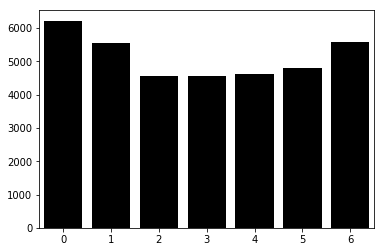

In [38]:
bar_plot(dog_orders_merge_2['order_dow'].value_counts())

#### What house of the day were dog food care products purchased?

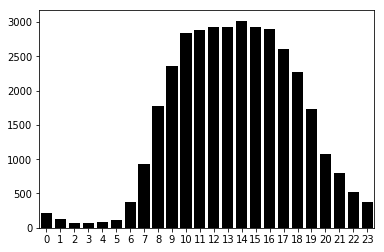

In [39]:
bar_plot(dog_orders_merge_2['order_hour_of_day'].value_counts())

#### Isolating dog food care products with 'Food' in the name

In [40]:
dog_food_orders_merged = dog_orders_merge_2[dog_orders_merge_2['product_name'].str.contains('Food')]
dog_food_orders_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,12,43511,15,0,152610,prior,22,6,8,10.0,Sunrise Grilled Steak and Eggs Canine Cuisine ...,40,8
1,24991,43511,11,1,112149,prior,9,3,18,7.0,Sunrise Grilled Steak and Eggs Canine Cuisine ...,40,8
2,41236,43511,17,0,290,prior,1,6,11,NaN,Sunrise Grilled Steak and Eggs Canine Cuisine ...,40,8
3,47940,43511,20,1,290,prior,19,6,10,7.0,Sunrise Grilled Steak and Eggs Canine Cuisine ...,40,8
4,67116,43511,1,1,166595,prior,3,0,20,21.0,Sunrise Grilled Steak and Eggs Canine Cuisine ...,40,8


#### What days of the week were dog food care 'food' products purchased?

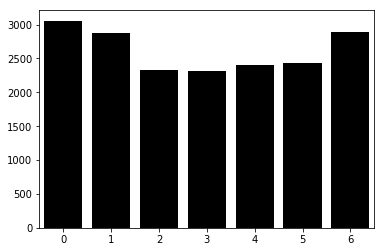

In [41]:
bar_plot(dog_food_orders_merged['order_dow'].value_counts())

#### What hour of the day were dog food care 'food' products purchased?

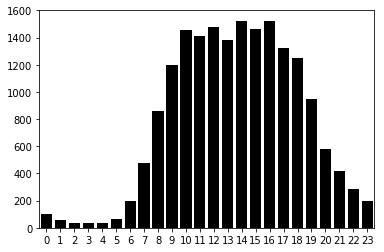

In [42]:
bar_plot(dog_food_orders_merged['order_hour_of_day'].value_counts())

#### Isolating dog food care products with 'Chew' in the name

In [43]:
dog_chew_orders_merged = dog_orders_merge_2[dog_orders_merge_2['product_name'].str.contains('Chew')]
dog_chew_orders_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
5285,1878,48252,15,0,113643,prior,12,6,12,16.0,Original Soft & Chewy With All Natural Grilled...,40,8
5286,24796,48252,1,0,35243,prior,1,5,12,NaN,Original Soft & Chewy With All Natural Grilled...,40,8
5287,441591,48252,30,0,169386,prior,7,1,17,30.0,Original Soft & Chewy With All Natural Grilled...,40,8
5288,924873,48252,10,0,137195,prior,24,4,17,5.0,Original Soft & Chewy With All Natural Grilled...,40,8
5289,980554,48252,28,1,169386,prior,9,0,15,30.0,Original Soft & Chewy With All Natural Grilled...,40,8


#### What days of the week were dog food care 'chew' products purchased?

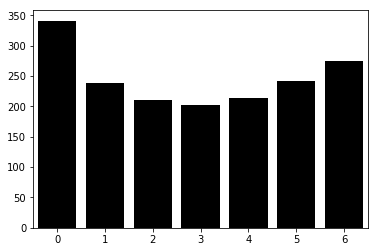

In [44]:
bar_plot(dog_chew_orders_merged['order_dow'].value_counts())

#### What hour of the day were dog food care 'chew' products purchased?

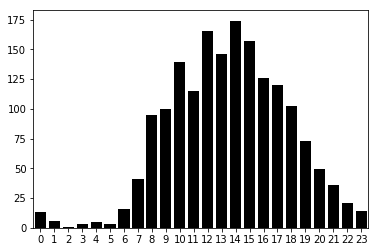

In [45]:
bar_plot(dog_chew_orders_merged['order_hour_of_day'].value_counts())

#### Isolating dog food care products with 'Treat' in the name

In [46]:
dog_treat_orders_merged = dog_orders_merge_2[dog_orders_merge_2['product_name'].str.contains('Treat')]
dog_treat_orders_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
1802,769,4896,4,0,37708,prior,6,4,10,19.0,"Premium Dog Treats Peanut Butter Flavor, Mediu...",40,8
1803,9704,4896,10,0,103546,prior,21,0,10,8.0,"Premium Dog Treats Peanut Butter Flavor, Mediu...",40,8
1804,9891,4896,5,0,69082,prior,17,1,11,0.0,"Premium Dog Treats Peanut Butter Flavor, Mediu...",40,8
1805,12489,4896,2,1,61425,prior,11,0,14,13.0,"Premium Dog Treats Peanut Butter Flavor, Mediu...",40,8
1806,16771,4896,11,0,111880,prior,1,3,16,NaN,"Premium Dog Treats Peanut Butter Flavor, Mediu...",40,8


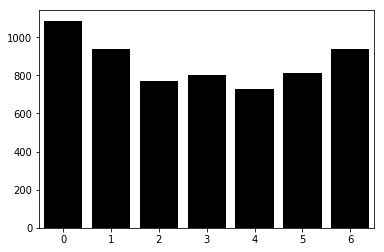

In [47]:
bar_plot(dog_treat_orders_merged['order_dow'].value_counts())

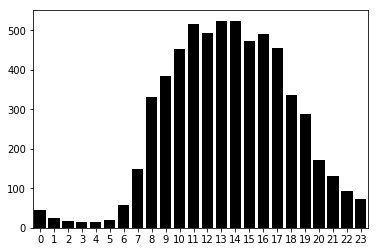

In [48]:
bar_plot(dog_treat_orders_merged['order_hour_of_day'].value_counts())